# Introduction/Business Problem
In the capstone project for IBM certificate course, the aim is to analyse the accident "severity" whether in terms of fatality or traffic or accidents or any other type of bad impact. All records were provided by SPD and recorded by Traffic Records and provided to me by Coursera. This dataset covers a period of 2004 to present. It contains information such as severity code, address type, weather, road condition, speeding, etc.

The audience will be road users who will benefit from information that will possibly help reduce traffic collision/accidents in the future and also assist with travel plans. This model can alert/assist road users know when the road is safe or bad so they can plan accordingly

# Data Understanding

There are 194,673 observations and 38 attributes in the dataset. The aim is to identify the severity of an accident and the possible factors that can lead to one. From the dataset, the SEVERITYCODE attribute will be used as the target variable (Y). The two types of severity are 1-prop damage and 2-injury
Feature Engineering process will be applied to ascertain the attributes that impact the severity of an accident. Missing value will either be replaced or removed from the dataset as well.

The columns that I will be using for the analysis are as follows:

- COLLISIONTYPE, which describes the type of crash, 
- WEATHER, description of the weather conditions during the time of the collision
- ROADCOND, condition of the road during the collision.
- LIGHTCOND, light conditions during the collision, 
- INATTENTIONIND, whether or not collision was due to inattention. (Y/N) 
- UNDERINFL, whether or not a driver involved was under the influence of drugs or alcohol.
- SEVERITYCODE, corresponds to the severity of the collision and assigns a crash a value of 1, which means property damage collison, and 2, indicating injury

# Data Exploration, Cleaning and Analysis

In [1]:
#conda install -c conda-forge imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
collision = pd.read_csv("Data-Collisions.csv")
collision.head()

/Users/Abedinho/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
collision.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [6]:
collision['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
collision['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


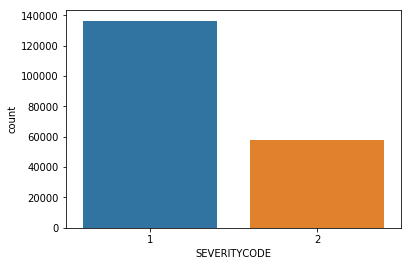

In [8]:
sns.countplot(x=collision['SEVERITYCODE'], data=collision)

In [9]:
collision.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [10]:
collision.drop(['X','Y','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','PEDROWNOTGRNT',
                 'SDOTCOLNUM','SPEEDING','INCKEY','COLDETKEY','INCDATE','INCDTTM','SDOTCOLNUM',
               'ST_COLCODE','ST_COLDESC','OBJECTID','STATUS','REPORTNO','LOCATION','SEVERITYDESC'
               ,'JUNCTIONTYPE','SDOT_COLDESC'],inplace=True, axis=1)

In [11]:
collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 17 columns):
SEVERITYCODE      194673 non-null int64
ADDRTYPE          192747 non-null object
SEVERITYCODE.1    194673 non-null int64
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
SDOT_COLCODE      194673 non-null int64
INATTENTIONIND    29805 non-null object
UNDERINFL         189789 non-null object
WEATHER           189592 non-null object
ROADCOND          189661 non-null object
LIGHTCOND         189503 non-null object
SEGLANEKEY        194673 non-null int64
CROSSWALKKEY      194673 non-null int64
HITPARKEDCAR      194673 non-null object
dtypes: int64(9), object(8)
memory usage: 25.2+ MB


In [12]:
collision['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [13]:
collision['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [14]:
collision['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [15]:
collision['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [16]:
collision.corr()

,SEVERITYCODE,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.104276,0.175093
SEVERITYCODE.1,1.000000,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.104276,0.175093
PERSONCOUNT,0.130949,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,-0.021383,-0.032258
PEDCOUNT,0.246338,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.001810,0.565326
PEDCYLCOUNT,0.214218,0.214218,-0.038809,-0.016920,1.000000,-0.253773,0.382521,0.453657,0.109820
VEHCOUNT,-0.054686,-0.054686,0.380523,-0.261285,-0.253773,1.000000,-0.365814,-0.122941,-0.200526
SDOT_COLCODE,0.188905,0.188905,-0.128960,0.260393,0.382521,-0.365814,1.000000,0.206835,0.189518
SEGLANEKEY,0.104276,0.104276,-0.021383,0.001810,0.453657,-0.122941,0.206835,1.000000,-0.003422
CROSSWALKKEY,0.175093,0.175093,-0.032258,0.565326,0.109820,-0.200526,0.189518,-0.003422,1.000000


In [17]:
collision['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [18]:
collision = pd.get_dummies(collision, columns=['WEATHER','COLLISIONTYPE','LIGHTCOND','ROADCOND','UNDERINFL',
                                              'INATTENTIONIND','ADDRTYPE','HITPARKEDCAR'])

In [19]:
collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 58 columns):
SEVERITYCODE                          194673 non-null int64
SEVERITYCODE.1                        194673 non-null int64
PERSONCOUNT                           194673 non-null int64
PEDCOUNT                              194673 non-null int64
PEDCYLCOUNT                           194673 non-null int64
VEHCOUNT                              194673 non-null int64
SDOT_COLCODE                          194673 non-null int64
SEGLANEKEY                            194673 non-null int64
CROSSWALKKEY                          194673 non-null int64
WEATHER_Blowing Sand/Dirt             194673 non-null uint8
WEATHER_Clear                         194673 non-null uint8
WEATHER_Fog/Smog/Smoke                194673 non-null uint8
WEATHER_Other                         194673 non-null uint8
WEATHER_Overcast                      194673 non-null uint8
WEATHER_Partly Cloudy                 194673 non-

In [20]:
collision.corr().SEVERITYCODE.sort_values()

COLLISIONTYPE_Parked Car             -0.304148
ADDRTYPE_Block                       -0.184745
ROADCOND_Unknown                     -0.157748
WEATHER_Unknown                      -0.155038
LIGHTCOND_Unknown                    -0.151296
COLLISIONTYPE_Sideswipe              -0.116638
HITPARKEDCAR_Y                       -0.101498
VEHCOUNT                             -0.054686
COLLISIONTYPE_Other                  -0.033384
UNDERINFL_0                          -0.030285
ADDRTYPE_Alley                       -0.025790
COLLISIONTYPE_Right Turn             -0.025194
WEATHER_Other                        -0.022824
ROADCOND_Snow/Slush                  -0.020851
WEATHER_Snowing                      -0.016495
LIGHTCOND_Dark - No Street Lights    -0.015901
ROADCOND_Ice                         -0.012623
LIGHTCOND_Dark - Street Lights Off   -0.006079
LIGHTCOND_Other                      -0.005895
WEATHER_Sleet/Hail/Freezing Rain     -0.002691
ROADCOND_Standing Water              -0.002020
WEATHER_Blowi

In [21]:
collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 58 columns):
SEVERITYCODE                          194673 non-null int64
SEVERITYCODE.1                        194673 non-null int64
PERSONCOUNT                           194673 non-null int64
PEDCOUNT                              194673 non-null int64
PEDCYLCOUNT                           194673 non-null int64
VEHCOUNT                              194673 non-null int64
SDOT_COLCODE                          194673 non-null int64
SEGLANEKEY                            194673 non-null int64
CROSSWALKKEY                          194673 non-null int64
WEATHER_Blowing Sand/Dirt             194673 non-null uint8
WEATHER_Clear                         194673 non-null uint8
WEATHER_Fog/Smog/Smoke                194673 non-null uint8
WEATHER_Other                         194673 non-null uint8
WEATHER_Overcast                      194673 non-null uint8
WEATHER_Partly Cloudy                 194673 non-

In [22]:
y=collision['SEVERITYCODE']

In [23]:
coll = collision.drop(['SEVERITYCODE'],axis=1)
X = coll

# Machine Learning Algorithms

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [25]:
from collections import Counter

rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)

# new class distribution
print(Counter(y_rus))

Counter({1: 58188, 2: 58188})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus, test_size=0.33, random_state=42)

In [55]:
#Using Logistic Regression Classifier
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)
print(classification_report(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(jaccard_similarity_score(y_test, pred_lr))
print ("training accuracy: {:.2f}".format(lr.score(X_train,y_train)))
print ("test accuracy: {:.2f}".format(lr.score(X_test,y_test)))

/Users/Abedinho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           1       1.00      0.00      0.00     19331
           2       0.50      1.00      0.66     19074

   micro avg       0.50      0.50      0.50     38405
   macro avg       0.75      0.50      0.33     38405
weighted avg       0.75      0.50      0.33     38405

[[   13 19318]
 [    0 19074]]
0.49699257909126415
training accuracy: 0.50
test accuracy: 0.50


In [30]:
#Using K-Nearest Neighbor
from sklearn.model_selection import cross_val_score

#import the train and test split function
cross_val_scores = []
 
neighbors = np.arange(1,30,2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    #perform cross-validation with a given model
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))

print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors           : {}".format(best_n_neighbors))
 
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score             : {:.3f}".format(knn.score(X_test, y_test)))

best cross-validation score: 0.977
best n_neighbors           : 11
test-set score             : 0.979
              precision    recall  f1-score   support

           1       0.97      0.97      0.97     19278
           2       0.97      0.97      0.97     19127

   micro avg       0.97      0.97      0.97     38405
   macro avg       0.97      0.97      0.97     38405
weighted avg       0.97      0.97      0.97     38405

[[18781   497]
 [  550 18577]]
training accuracy: 1.00
test accuracy: 0.97


In [51]:
knn = KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print(classification_report(pred_knn,y_test))
print(confusion_matrix(pred_knn,y_test))
 
print ("training accuracy: {:.2f}".format(knn.score(X_train,y_train)))
print ("test accuracy: {:.2f}".format(knn.score(X_test,y_test)))
print(jaccard_similarity_score(y_test, pred_knn))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98     19272
           2       0.98      0.98      0.98     19133

   micro avg       0.98      0.98      0.98     38405
   macro avg       0.98      0.98      0.98     38405
weighted avg       0.98      0.98      0.98     38405

[[18895   377]
 [  436 18697]]
training accuracy: 0.98
test accuracy: 0.98
0.9788308813956516


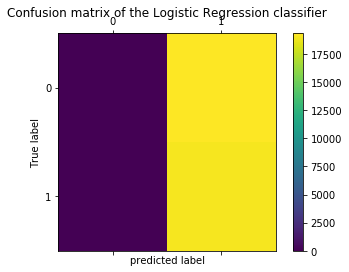

In [59]:
cm = confusion_matrix(y_test,pred_lr)
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(cm)
plt.title("Confusion matrix of the Logistic Regression classifier")
fig.colorbar(cax)
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.show()

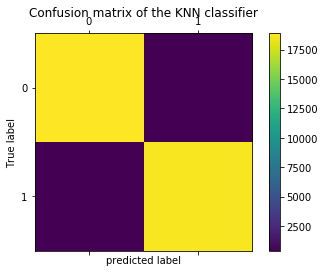

In [60]:
cm = confusion_matrix(y_test,pred_knn)
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(cm)
plt.title("Confusion matrix of the KNN classifier")
fig.colorbar(cax)
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.show()